## Goal: Analyze the correlations between the factors we have created and the anisotropy matrix generated from the polarized spectra 

In [82]:
import os
import json
import helpers

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from pathlib import Path

import importlib
importlib.reload(helpers) 

# Standardizing Plots
plt.rcParams['axes.labelsize'] = 20
plt.rcParams['axes.titlesize'] = 25
plt.rcParams['xtick.direction'] = 'in'
plt.rcParams['ytick.direction'] = 'in'
plt.rcParams['xtick.labelsize'] = 15
plt.rcParams['ytick.labelsize'] = 15
plt.rcParams['lines.linewidth'] = 2
plt.rcParams['legend.fontsize'] = 15
plt.rcParams['legend.loc'] = 'upper left'
plt.rcParams['legend.fancybox'] = True
plt.rcParams['figure.figsize'] = (10, 6)

plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.serif'] = 'Times New Roman'
plt.rcParams['mathtext.fontset'] = 'custom'
plt.rcParams['mathtext.rm'] = 'Times New Roman'

Factor Dictionaries 

In [83]:
#Read in file and turn it into a dataframe

Cr_data_path = "Cr_data/Cr_fd_2_21_2025"
Cu_data_path = "Cu_data/Cu_fd_2_10_2025"
Fe_data_path = "Fe_data/Fe_fd_2_10_2025"

factor_dict_dir_path = Path(Fe_data_path)
os.listdir(factor_dict_dir_path)

['logs',
 'mp-1005_factor_dict.json',
 'mp-1007881_factor_dict.json',
 'mp-1008872_factor_dict.json',
 'mp-1008927_factor_dict.json',
 'mp-1009019_factor_dict.json',
 'mp-1009592_factor_dict.json',
 'mp-1022130_factor_dict.json',
 'mp-1022236_factor_dict.json',
 'mp-1022242_factor_dict.json',
 'mp-1022315_factor_dict.json',
 'mp-1022325_factor_dict.json',
 'mp-1022329_factor_dict.json',
 'mp-1022464_factor_dict.json',
 'mp-1025047_factor_dict.json',
 'mp-1027782_factor_dict.json',
 'mp-1027814_factor_dict.json',
 'mp-1027859_factor_dict.json',
 'mp-1027898_factor_dict.json',
 'mp-1027992_factor_dict.json',
 'mp-1028021_factor_dict.json',
 'mp-1028142_factor_dict.json',
 'mp-1028160_factor_dict.json',
 'mp-1028207_factor_dict.json',
 'mp-1028242_factor_dict.json',
 'mp-1028387_factor_dict.json',
 'mp-1029659_factor_dict.json',
 'mp-1032174_factor_dict.json',
 'mp-1032452_factor_dict.json',
 'mp-1032522_factor_dict.json',
 'mp-1032542_factor_dict.json',
 'mp-1032625_factor_dict.json',
 '

Explore Factor Dictionary Data

In [84]:
mp_374 = helpers.print_factor_dict("Cr_data/Cr_fd_2_9_2025/mp-374_factor_dict.json")


Contents of mp-374_factor_dict.json:
--------------------------------------------------
MP-ID: mp-374
Material: CrB2
Space Group: P6/mmm
Space Group Number: 191
band_gap: 0.0
density: 5.3164020273198265
oxidation_states: {'Cr': 6.0, 'B': -3.0}
dipole moment normalized: [-1.3877787807814457e-17, 4.163336342344337e-17, 0.0]
normalized dipole anisotropy matrix: [[0.0, 5.551115123125783e-17, 1.3877787807814457e-17], [5.551115123125783e-17, 0.0, 4.163336342344337e-17], [1.3877787807814457e-17, 4.163336342344337e-17, 0.0]]
normalized dipole anisotropy matrix sum: 1.1102230246251565e-16
quadrupole moment normalized: [[-0.3700121475031763, 8.334382819302766e-09, 9.71445146547012e-17], [8.334382819302766e-09, -0.37001213787945697, 1.5265566588595902e-16], [9.71445146547012e-17, 1.5265566588595902e-16, -0.582578076044876]]
normalized quadrupole anisotropy matrix: [[0.0, 9.623719321449897e-09, 0.2125659285416997], [9.623719321449897e-09, 0.0, 0.21256593816541902], [0.2125659285416997, 0.21256593

#### Generate Factor DF

In [85]:
Cr_factor_df = helpers.generate_factor_df(Cr_data_path, mat_props = True, dipole = True, quadrupole = True)
#Cu_factor_df = helpers.generate_factor_df(Cu_data_path, mat_props = True, dipole = True, quadrupole = True)
#Fe_factor_df = helpers.generate_factor_df(Fe_data_path, mat_props = True, dipole = True, quadrupole = True)

factor_df = Cr_factor_df
#factor_df = Cu_factor_df
#factor_df = Fe_factor_df

# Display the DataFrame
print(factor_df.head())
print(factor_df.shape[0])


           Chem Formula    Cif Name  Space Group Number Average Bond Length  \
Material                                                                      
mp-1007974      Unknown  mp-1007974                 221            2.506386   
mp-1007974      Unknown  mp-1008280                 221            2.503139   
mp-1007974      Unknown  mp-1009079                 225            2.860465   
mp-1007974      Unknown  mp-1009485                 221            2.183625   
mp-1007974      Unknown  mp-1009592                 216            2.774729   

           Bond Length Std Number of Unique Ligands Average Electronegativity  \
Material                                                                        
mp-1007974             0.0                        1                      1.91   
mp-1007974         0.00076                        1                      1.88   
mp-1007974             0.0                        1                       2.1   
mp-1007974             0.0               

Load Anisotropy Matricies 

In [86]:
#Read in file and turn it into a dataframe
Cr_a_matrix_path = "Cr_data/a_matrix_data/04FEB25anisotropy_data.csv"
Cu_a_matrix_path = "Cu_data/a_matrix/Cu_05FEB_anisotropy_data.csv"
Fe_a_matrix_path = "Fe_data/a_matrix/Fe_05FEB25_anisotropy_data.csv"

Cr_spectra_df = helpers.load_anisotropy_matrix(Cr_a_matrix_path, "Cr")
#Cu_spectra_df = load_anisotropy_matrix(Cu_a_matrix_path, "Cu")
#Fe_spectra_df = helpers.load_anisotropy_matrix(Fe_a_matrix_path, "Fe")

spectra_df = Cr_spectra_df
#spectra_df = Cu_spectra_df
#spectra_df = Fe_spectra_df

#Check matrix formatting
print(spectra_df.head())
print(spectra_df.shape[0])

            m00           m01           m02           m10  m11           m12  \
Material                                                                       
mp-1007974  0.0  1.624495e-08  8.845475e-08  1.624495e-08  0.0  7.220980e-08   
mp-1008280  0.0  3.981900e-05  3.823830e-05  3.981900e-05  0.0  7.805731e-05   
mp-1009079  0.0  1.610815e-06  9.435559e-07  1.610815e-06  0.0  2.554371e-06   
mp-1009485  0.0  8.745515e-08  1.286774e-07  8.745515e-08  0.0  4.122227e-08   
mp-1009592  0.0  1.841393e-07  5.119058e-07  1.841393e-07  0.0  6.960450e-07   

                     m20           m21  m22  
Material                                     
mp-1007974  8.845475e-08  7.220980e-08  0.0  
mp-1008280  3.823830e-05  7.805731e-05  0.0  
mp-1009079  9.435559e-07  2.554371e-06  0.0  
mp-1009485  1.286774e-07  4.122227e-08  0.0  
mp-1009592  5.119058e-07  6.960450e-07  0.0  
745


Clean data 

In [87]:
factor_df, spectra_df = helpers.align_dataframes(factor_df, spectra_df)

Check the cleaning and alligning

In [88]:
print("factor_df")
print(factor_df.head(5))
print(factor_df.tail(5))
print("anisotropy_matrix_df")
print(spectra_df.head(5))
print(spectra_df.tail(5))
print(factor_df.shape[0])
print(spectra_df.shape[0])

factor_df
           Chem Formula    Cif Name  Space Group Number Average Bond Length  \
Material                                                                      
mp-1007974      Unknown  mp-1009079                 225            2.860465   
mp-1007974      Unknown  mp-1009485                 221            2.183625   
mp-1007974      Unknown  mp-1014993                 205            2.063258   
mp-1007974      Unknown  mp-1014995                 166            1.728151   
mp-1007974      Unknown  mp-1016059                 141             1.73189   

           Bond Length Std Number of Unique Ligands Average Electronegativity  \
Material                                                                        
mp-1007974             0.0                        1                       2.1   
mp-1007974             0.0                        1                      3.04   
mp-1007974             0.0                        1                      3.04   
mp-1007974        0.002378     

Compute normed spacegroup number

In [89]:
factor_df = helpers.compute_normed_spacegroup_number(factor_df)

print(factor_df)

           Chem Formula    Cif Name  Space Group Number Average Bond Length  \
Material                                                                      
mp-1007974      Unknown  mp-1009079                 225            2.860465   
mp-1007974      Unknown  mp-1009485                 221            2.183625   
mp-1007974      Unknown  mp-1014993                 205            2.063258   
mp-1007974      Unknown  mp-1014995                 166            1.728151   
mp-1007974      Unknown  mp-1016059                 141             1.73189   
...                 ...         ...                 ...                 ...   
mp-1007974      Unknown   mp-851117                 146            3.295193   
mp-1007974      Unknown   mp-861904                 173            4.222568   
mp-1007974      Unknown     mp-9630                 160            3.188305   
mp-1007974      Unknown     mp-9916                 189            2.653821   
mp-1007974      Unknown   mp-998397                 

Compute sum of DM and QM Aniso sum

In [90]:
factor_df["Aniso Sum DM QM"] = factor_df["Aniso Sum DM"] + factor_df["Aniso Sum QM"]

Sum anisotropy matrix elements

In [91]:
spectra_df = helpers.compute_off_diagonal_sum(spectra_df)

print(spectra_df)


            m00           m01           m02           m10  m11           m12  \
Material                                                                       
mp-1007974  0.0  1.624495e-08  8.845475e-08  1.624495e-08  0.0  7.220980e-08   

                     m20           m21  m22  Anisotropy Matrix Sum  
Material                                                            
mp-1007974  8.845475e-08  7.220980e-08  0.0           1.769095e-07  


## Distribution of anisotropy matrix sum

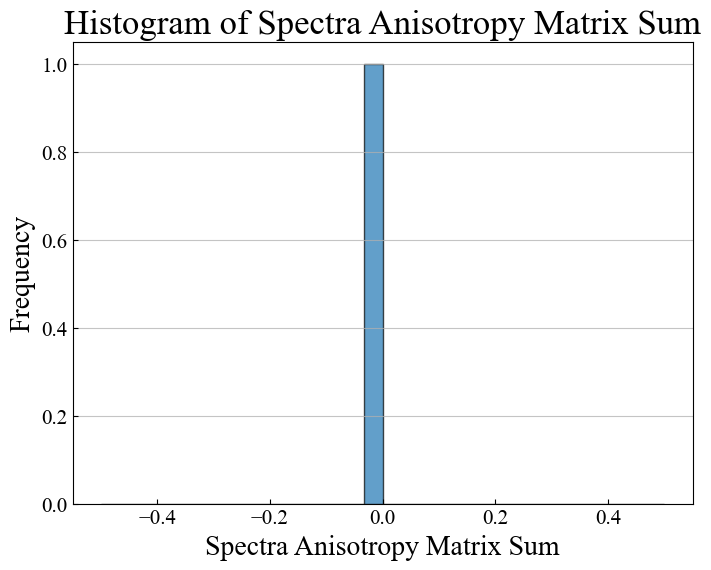

In [92]:

# Create a histogram of the specified column
plt.figure(figsize=(8, 6))
plt.hist(spectra_df["Anisotropy Matrix Sum"], bins=30, edgecolor='black', alpha=0.7)
plt.xlabel("Spectra Anisotropy Matrix Sum")
plt.ylabel("Frequency")
plt.title("Histogram of Spectra Anisotropy Matrix Sum")
plt.grid(axis='y', alpha=0.75)

# Display the plot
plt.show()

## Distribution of Dipole Anisotropy Matrix Sum

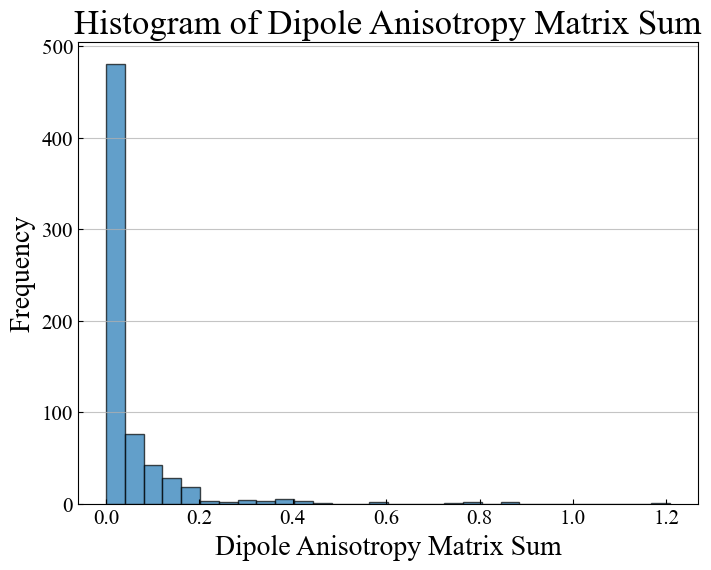

In [93]:
# Create a histogram of the specified column
plt.figure(figsize=(8, 6))
plt.hist(factor_df["Aniso Sum DM"], bins=30, edgecolor='black', alpha=0.7)
plt.xlabel("Dipole Anisotropy Matrix Sum")
plt.ylabel("Frequency")
plt.title("Histogram of Dipole Anisotropy Matrix Sum")
plt.grid(axis='y', alpha=0.75)

# Display the plot
plt.show()

## Distribution of Quadrupole Anisotropy Matrix Sum

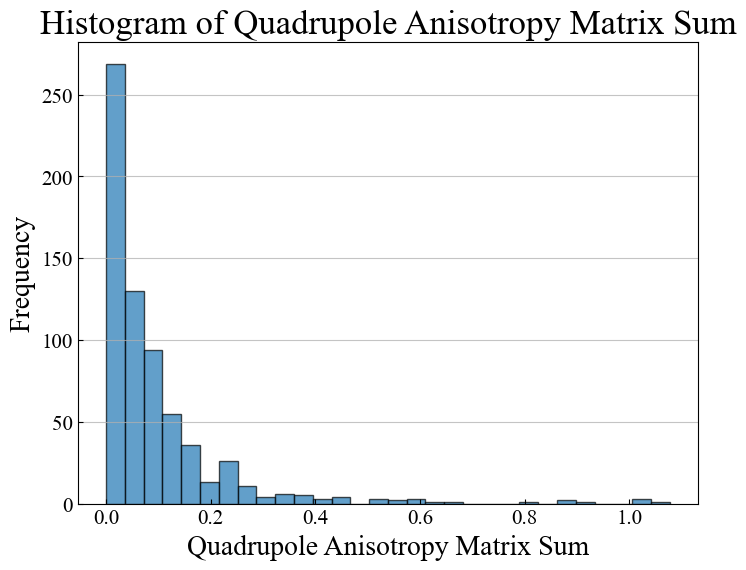

In [94]:

# Create a histogram of the specified column
plt.figure(figsize=(8, 6))
plt.hist(factor_df["Aniso Sum QM"], bins=30, edgecolor='black', alpha=0.7)
plt.xlabel("Quadrupole Anisotropy Matrix Sum")
plt.ylabel("Frequency")
plt.title("Histogram of Quadrupole Anisotropy Matrix Sum")
plt.grid(axis='y', alpha=0.75)

# Display the plot
plt.show()

### Look at scale of the QM aniso sum and anisotropy matrix sum

In [95]:
def sort_and_print_columns(column1, column2):
    """
    Sorts two columns (Pandas Series) in ascending order and prints them.

    Parameters:
    - column1: First column (Pandas Series) to sort, labeled as "Factor Column".
    - column2: Second column (Pandas Series) to sort, labeled as "Anisotropy Matrix Column".

    Returns:
    - None: Prints the sorted columns.
    """
    # Sort the columns
    sorted_column1 = column1.sort_values()
    sorted_column2 = column2.sort_values()

    # Print the sorted columns
    print("Sorted Factor Column:")
    print(sorted_column1)
    print("\nSorted Anisotropy Matrix Column:")
    print(sorted_column2)


sort_and_print_columns(factor_df["Aniso Sum QM"], spectra_df["Anisotropy Matrix Sum"])

Sorted Factor Column:
Material
mp-1007974    0.000000
mp-1007974    0.000000
mp-1007974    0.000000
mp-1007974    0.000000
mp-1007974    0.000000
                ...   
mp-1007974    0.920530
mp-1007974    1.005246
mp-1007974    1.023207
mp-1007974    1.033846
mp-1007974    1.076929
Name: Aniso Sum QM, Length: 674, dtype: float64

Sorted Anisotropy Matrix Column:
Material
mp-1007974    1.769095e-07
Name: Anisotropy Matrix Sum, dtype: float64


### Analyze correlations using Ordinary Least Squares (OLS)

#### Factor contributions

I'm going to start with only the un-normalized quadrupole moments

#### Anisotropy matrix formatting

I'm going to simplify the anisotropy matrix down to its base value by just summing all the values to get only a single 'anisotropy parameter' that I will be trying to predict. Later I'll look at the 3 off diagonal values independently.

In [96]:
import statsmodels.api as sm

# Define the independent variables (X) and dependent variable (y)

columns_to_use = [
    "Aniso Sum DM QM",
    "Aniso Sum DM",
    "Aniso DM 1",
    "Aniso DM 2",
    "Aniso DM 5",
    "Aniso Sum QM",
    "QM Norm 0",
    "QM Norm 4",
    "QM Norm 8",
    "Aniso QM 1",
    "Aniso QM 2",
    "Aniso QM 5",
    "Band Gap",
    "Density",
    "Normed Spacegroup Number",
    "Average Bond Length",
    "Bonth Length Std",
    "Number of Unique Ligands",
    "Average Electronegativity",
    "Std Electronegativity"
]

#X = factor_df
X = factor_df[columns_to_use]

#Declare y
y = spectra_df["Anisotropy Matrix Sum"]


# Ensure X and y are aligned
X, y = X.align(y, axis=0)

# Convert all data to numeric
X = X.apply(pd.to_numeric, errors='coerce')
y = pd.to_numeric(y, errors='coerce')

# Add a constant to X for the intercept
X = sm.add_constant(X)

# Drop any rows with NaN values in X or y
X = X.dropna()
y = y.loc[X.index]  # Ensure the index alignment is maintained

# Add a constant to the independent variables (intercept term)
X = sm.add_constant(X)


model = sm.OLS(y, X)
results = model.fit()
print(results.summary())

KeyError: "['Bonth Length Std'] not in index"

<>:9: SyntaxWarning: invalid escape sequence '\h'
<>:9: SyntaxWarning: invalid escape sequence '\h'
C:\Users\John\AppData\Local\Temp\ipykernel_26980\1122481050.py:9: SyntaxWarning: invalid escape sequence '\h'
  plt.ylabel("Predicted Output ($\hat{y}$)", fontsize=14)
C:\Users\John\AppData\Local\Temp\ipykernel_26980\1122481050.py:15: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.annotate(txt, (y[i], y_pred.iloc[i]), fontsize=8, alpha=0.7)


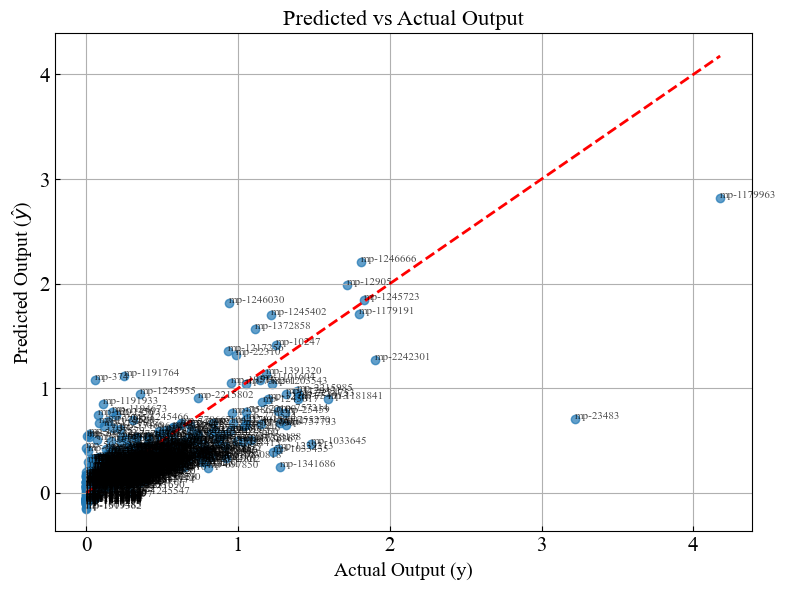

In [ ]:
# Predicted output from the model
y_pred = results.predict(X)

# Plot predicted vs actual
plt.figure(figsize=(8, 6))
plt.scatter(y, y_pred, alpha=0.7)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--', lw=2)
plt.xlabel("Actual Output (y)", fontsize=14)
plt.ylabel("Predicted Output ($\hat{y}$)", fontsize=14)
plt.title("Predicted vs Actual Output", fontsize=16)
plt.grid(True)

# Annotate each point with its index label
for i, txt in enumerate(y.index):
    plt.annotate(txt, (y[i], y_pred.iloc[i]), fontsize=8, alpha=0.7)

plt.tight_layout()
plt.show()